In [1]:
import pandas as pd

In [21]:
df=pd.read_csv('Data/cubic_zirconia.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [7]:
help(df.rename)

Help on method rename in module pandas.core.frame:

rename(mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool | None' = None, inplace: 'bool' = False, level: 'Level' = None, errors: 'IgnoreRaise' = 'ignore') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, a

In [22]:
df=df.rename(columns={'Unnamed: 0':'id'})

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.shape

(26967, 11)

In [10]:
#Ingestions step :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26270 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [12]:
#Missing values 10 
df.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [23]:
#dropping the id column : All unique values no use
df.drop(['id'],axis=1,inplace=True)

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [16]:
#Check for duplicated records
df.duplicated().sum()

34

In [17]:
#Droping duplicates 
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.
    
        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.
    
    inplace : bool, default ``False``
        Whether to modif

In [5]:
df=df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [9]:
#Seggregate numerical and categorical columnns
numeric_columns=df.select_dtypes(exclude='object').columns

In [10]:
categorical_columns=df.select_dtypes(include='object').columns

In [27]:
numeric_columns,categorical_columns

(Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [29]:
df[categorical_columns].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [31]:
df[numeric_columns].describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [33]:
df['cut'].unique(),df['cut'].nunique()

(array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object), 5)

In [35]:
df['cut']

0            Ideal
1          Premium
2        Very Good
3            Ideal
4            Ideal
           ...    
26962      Premium
26963        Ideal
26964      Premium
26965    Very Good
26966      Premium
Name: cut, Length: 26933, dtype: object

In [39]:
for i in categorical_columns:
    print(df[i].unique(),df[i].nunique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair'] 5
['E' 'G' 'F' 'D' 'H' 'J' 'I'] 7
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1'] 8


In [41]:
df.shape

(26933, 10)

In [40]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
df.dropna(inplace=True)

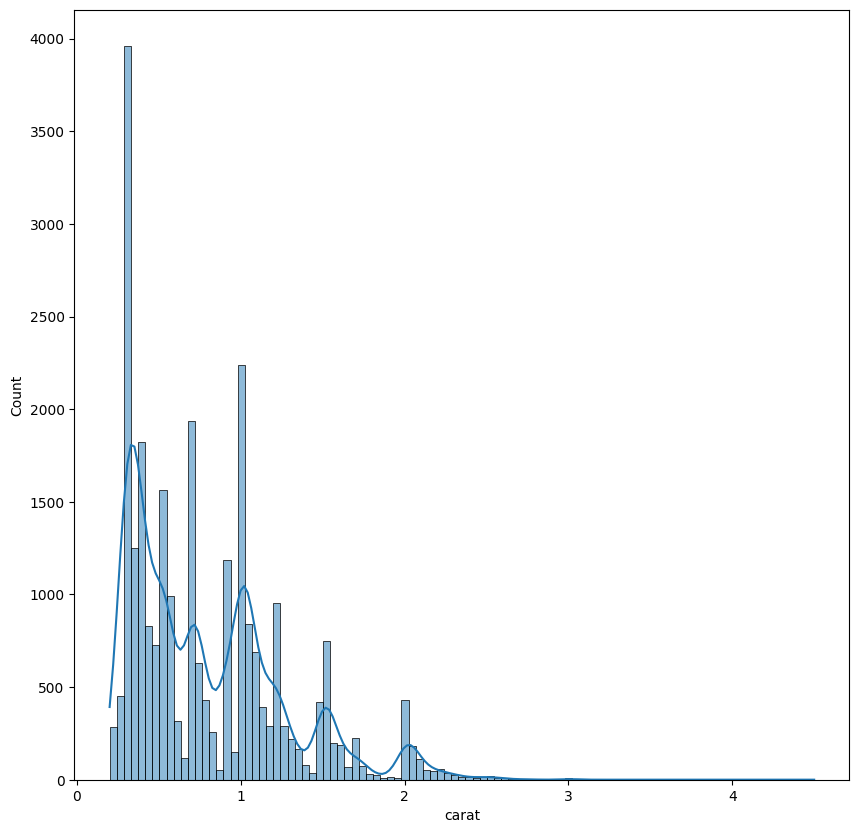

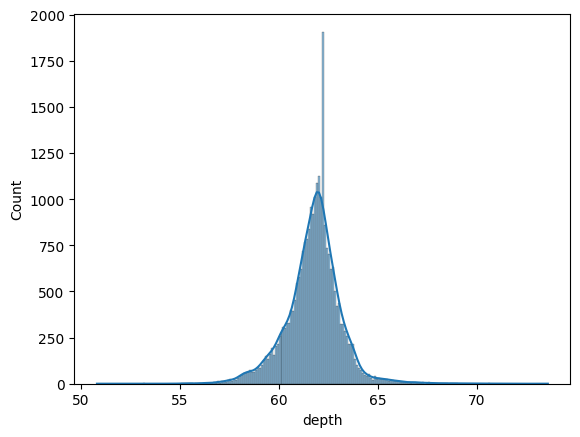

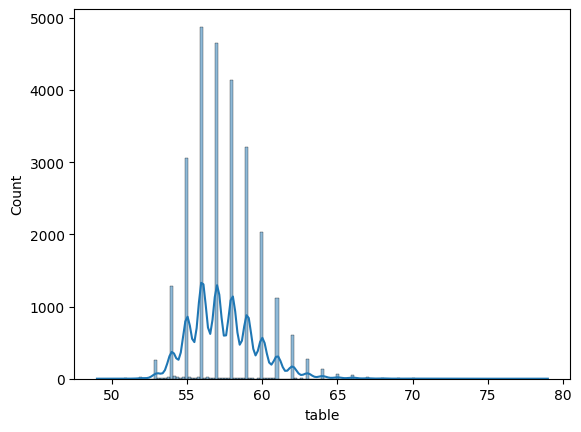

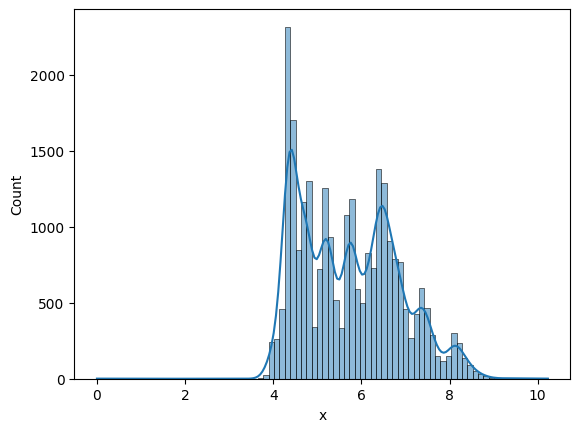

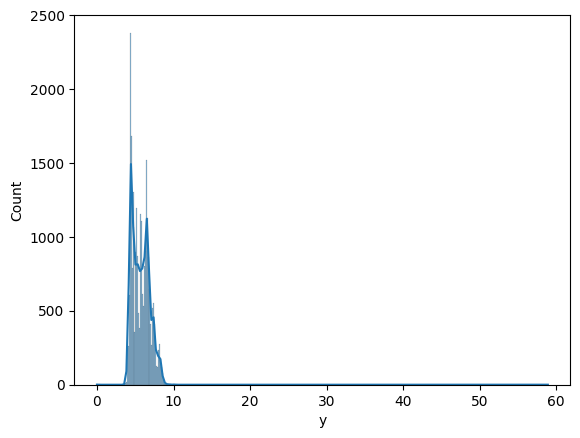

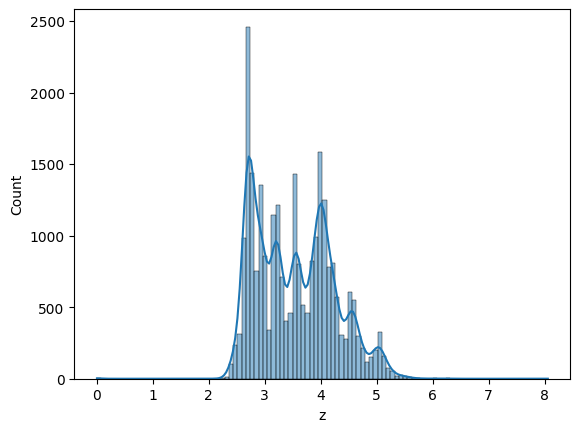

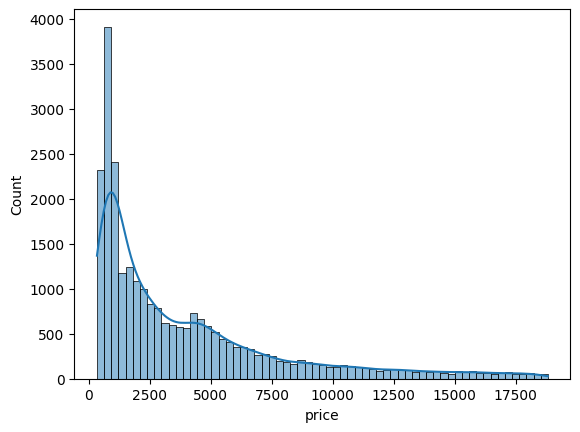

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in numeric_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

# Assignment : Do the same for categorical data

1. barplot
2. Countplot

<Axes: >

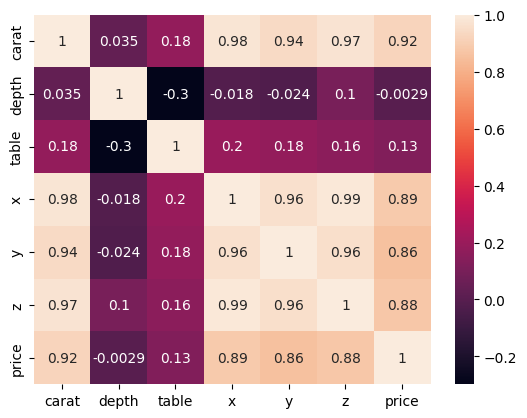

In [47]:
#Heatmap using correlation values 
sns.heatmap(df[numeric_columns].corr(),annot=True)

Here x,y,z are Independednt features which are highly correlated with caret(Independent feature) and to each other as well so we can remove three of them because x,y,z almost equal to caret so we can remove them. This situation which is Independent features which are highly correlated to each other , this condition is called as multicollinearity 

In [13]:
#This has to happen But for now we won't do this but yeah later stages we do this
df.drop(['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779
...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,5408
26963,0.33,Ideal,H,IF,61.9,55.0,1114
26964,0.51,Premium,E,VS2,61.7,58.0,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,682


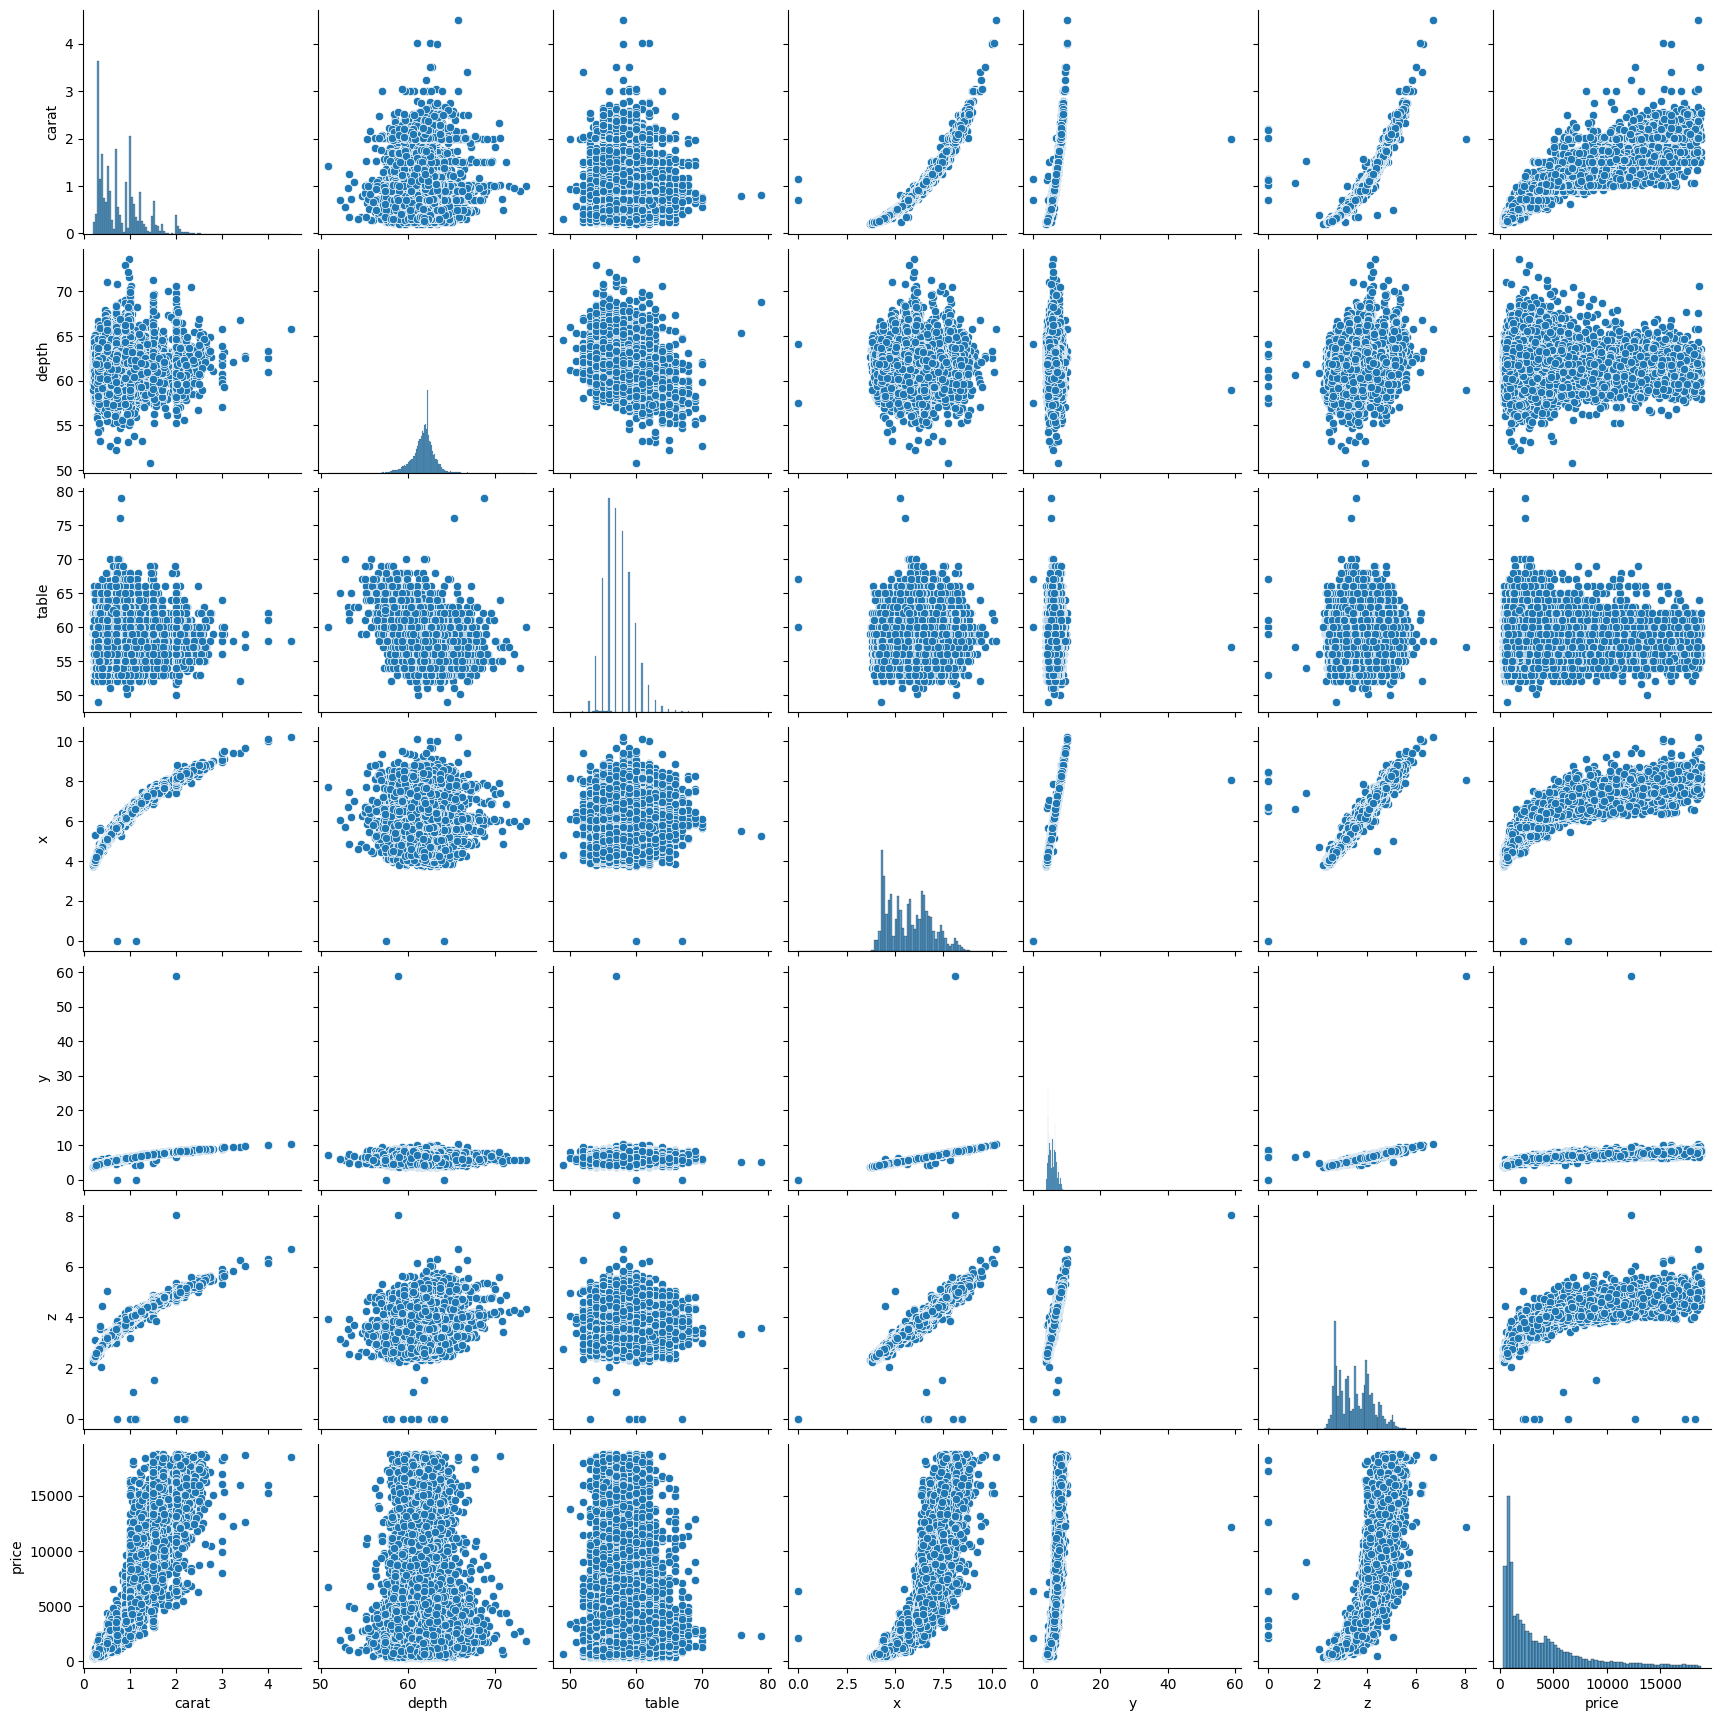

In [50]:
sns.pairplot(df)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [9]:
for i in df.select_dtypes(include='object'):
    print(i,df[i].unique())

cut ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color ['E' 'G' 'F' 'D' 'H' 'J' 'I']
clarity ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [11]:
clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8 }

In [12]:
color_map={'E':2, 'G':4, 'F':3, 'D':1 ,'H':5, 'J':7 ,'I':6}

In [13]:
cut_map={'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1}

In [24]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [26]:
df['cut']=df['cut'].replace(cut_map)
df['clarity']=df['clarity'].replace(clarity_map)
df['color']=df['color'].replace(color_map)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
